# GDP ANALYSIS: VARIABLE COTRIBUTION AND ACCURANCY CHECKING
Using data(1980-2021)

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats 
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

# Import data Frame

In [189]:
df=pd.read_csv("GDP_data.csv")
df.rename(columns={'Time':'Year'},inplace=True)
df.head()

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,NaN,8.71,20.12
1,1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,NaN,3.79,19.81
2,1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,NaN,4.22,20.04
3,1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,NaN,10.21,20.87
4,1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.04,7.36,21.43


In [190]:

df.shape
# df["FDIO"].fillna(0,inplace=True)
# G_F_C_E fill null by the mean

x=df["G_F_C_E"].mean()
df["G_F_C_E"].fillna(x,inplace=True)
## G_Savings null values replace by their mean
x=df["G_Savings"].mean()
df["G_Savings"].fillna(x,inplace=True)
x=df["Remittances"].min()
df["Remittances"].fillna(x,inplace=True)

#Reserve	replace null value by mean value
x=df["Reserve"].mean()
df["Reserve"].fillna(x,inplace=True)
#Stocks null value replace by mean value
x=df["U Rate"].median()
df["U Rate"].fillna(x,inplace=True)
#Foregin direct investment inflow
# df["FDII"].fillna(0,inplace=True)

df.head(5)

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,3.38,8.71,20.12
1,1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,3.38,3.79,19.81
2,1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,3.38,4.22,20.04
3,1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,3.38,10.21,20.87
4,1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.04,7.36,21.43


In [191]:
#Correlation matrix
df = round(df,2)
df
df.columns


Index(['Year', 'Exports', 'FCE', 'GDP', 'G_F_C_E', 'D_Savings', 'G_Savings',
       'Imports', 'Inflation', 'Remittances', 'U Rate', 'Reserve', 'Industry'],
      dtype='object')

In [192]:

data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()



,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


# Min-Max scaling

In [193]:

data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()



,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


In [194]:
x2=df.Year
df=pd.concat([x2,df_norm],axis=1)
df.head()

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


In [195]:
x2.shape

(43,)

In [196]:
df_norm.shape

(43, 12)

In [197]:
df.to_csv("cleanned_data12.csv")

# Import clean data frame

In [198]:
df=pd.read_csv("cleanned_data12.csv")
df.head(10)



,Unnamed: 0,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793
5,5,1985,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.269608,0.022463,0.050279
6,6,1986,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009804,0.023004,0.054469
7,7,1987,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.602941,0.070501,0.000000
8,8,1988,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.602941,0.090528,0.023743
9,9,1989,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.013268


In [199]:
list(df.columns)
df=df.drop('Unnamed: 0',axis=1)
df

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793
5,1985,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.269608,0.022463,0.050279
6,1986,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009804,0.023004,0.054469
7,1987,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.602941,0.070501,0.000000
8,1988,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.602941,0.090528,0.023743
9,1989,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.013268


# Correlation matrix

In [200]:
cor=df.corr()
cor

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
Year,1.000000,0.790233,-0.902927,0.689809,0.773218,0.902927,0.901203,0.665578,-0.194604,0.691105,0.466097,0.826480,0.896727
Exports,0.790233,1.000000,-0.656600,0.622348,0.551832,0.656600,0.866409,0.925976,-0.157967,0.901113,0.516602,0.631762,0.506289
FCE,-0.902927,-0.656600,1.000000,-0.685654,-0.613177,-1.000000,-0.883394,-0.475156,0.162893,-0.543367,-0.405353,-0.714242,-0.798536
GDP,0.689809,0.622348,-0.685654,1.000000,0.454190,0.685654,0.683719,0.530272,-0.156871,0.497556,0.366894,0.548621,0.613760
G_F_C_E,0.773218,0.551832,-0.613177,0.454190,1.000000,0.613177,0.556594,0.508379,-0.032324,0.415821,0.500743,0.700437,0.813245
D_Savings,0.902927,0.656600,-1.000000,0.685654,0.613177,1.000000,0.883394,0.475156,-0.162893,0.543367,0.405353,0.714242,0.798536
G_Savings,0.901203,0.866409,-0.883394,0.683719,0.556594,0.883394,1.000000,0.760877,-0.158734,0.867513,0.477104,0.759363,0.703212
Imports,0.665578,0.925976,-0.475156,0.530272,0.508379,0.475156,0.760877,1.000000,-0.042988,0.897937,0.442654,0.576913,0.432776
Inflation,-0.194604,-0.157967,0.162893,-0.156871,-0.032324,-0.162893,-0.158734,-0.042988,1.000000,-0.117729,-0.078587,0.074271,-0.099275
Remittances,0.691105,0.901113,-0.543367,0.497556,0.415821,0.543367,0.867513,0.897937,-0.117729,1.000000,0.452117,0.603193,0.421684


# Heatmap

<Axes: >

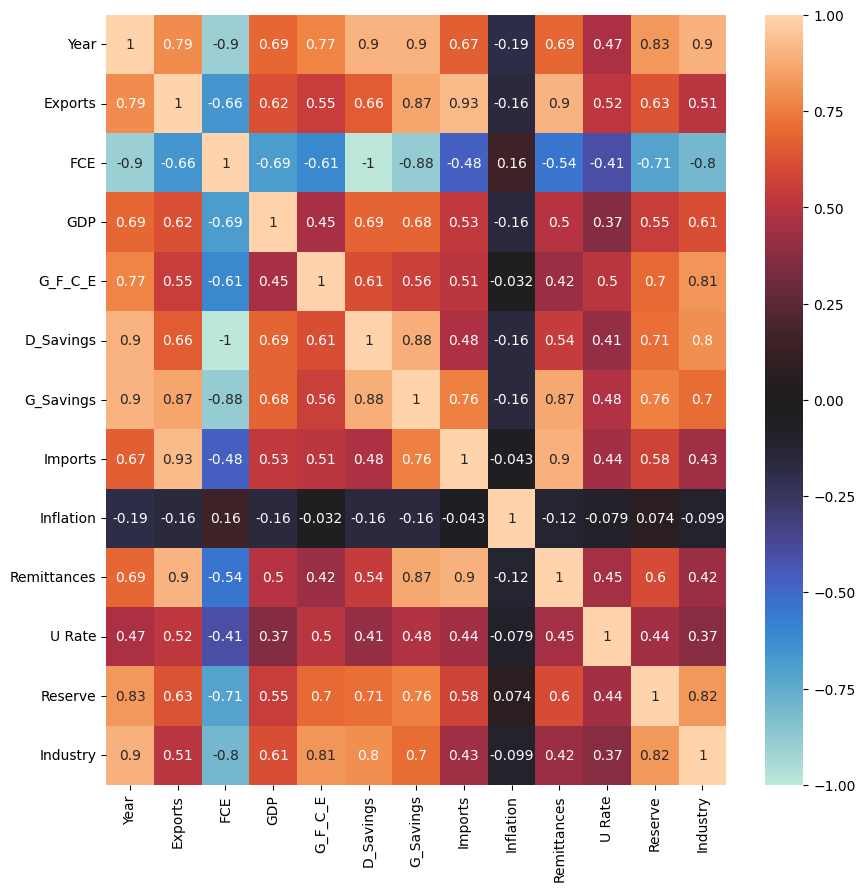

In [201]:
#Heatmap
plt.figure(figsize=(10,10))
           
                
annot=True
hemap=sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=annot)
hemap

# Upper trangular matrix

In [202]:
mask = np.triu(np.ones_like(df.corr()))
 

<function matplotlib.pyplot.show(close=None, block=None)>

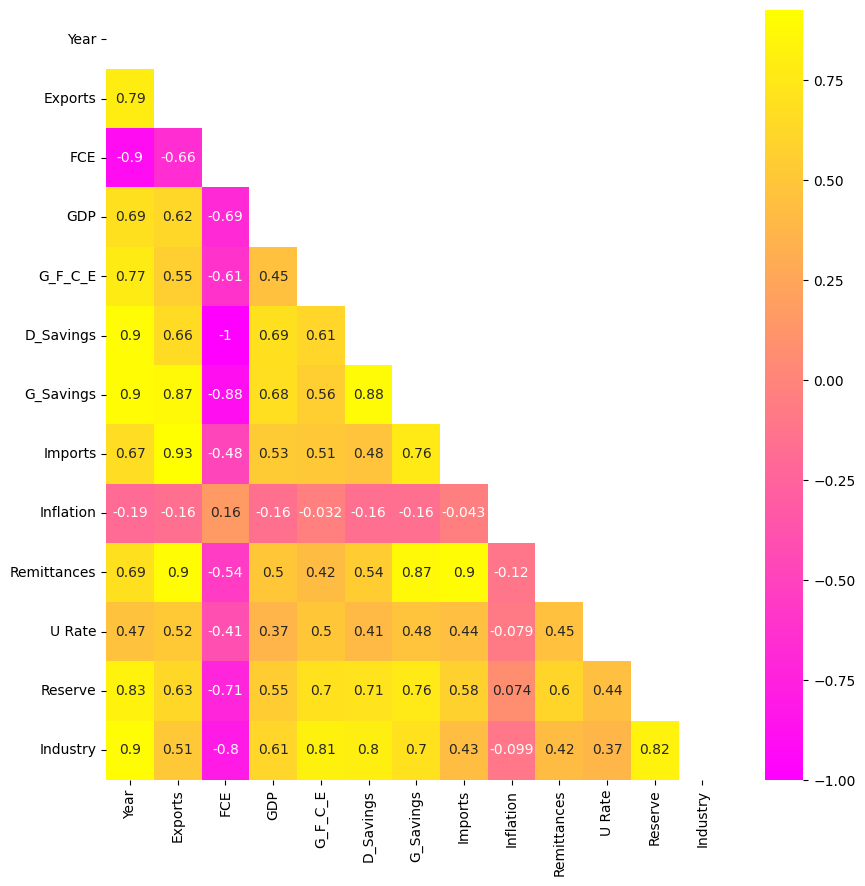

In [203]:
#upper trangular correlation matrix
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), mask=mask,cmap="spring",annot=True)
plt.show
# plt.savefig("upper_trangular_matrix.png")

# Lower Trangular Matrix

In [204]:
mask = np.tril(np.ones_like(df.corr()))

<function matplotlib.pyplot.show(close=None, block=None)>

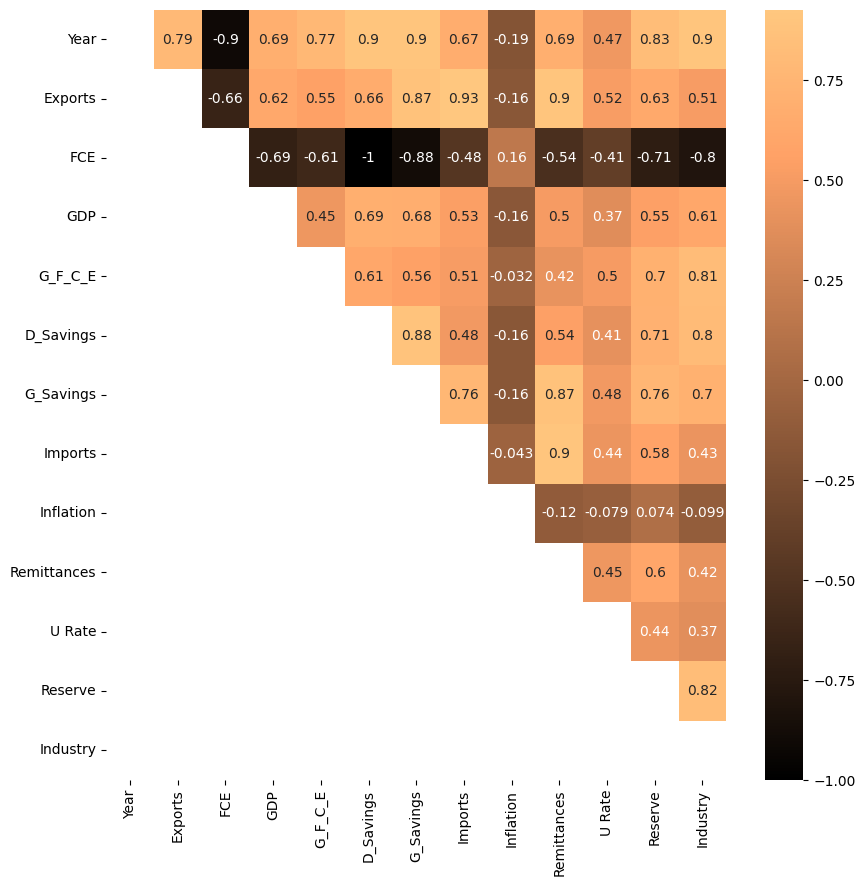

In [205]:
#Lower trangular correlation matrix.
# mask1=
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), mask=mask,cmap="copper",annot=True)
plt.show

# Multiple Linear Regrssion

In [206]:
x=df.drop("GDP",axis=1)
x1=df.Year

y=df.GDP
x.shape,x1.shape,y.shape

((43, 12), (43,), (43,))

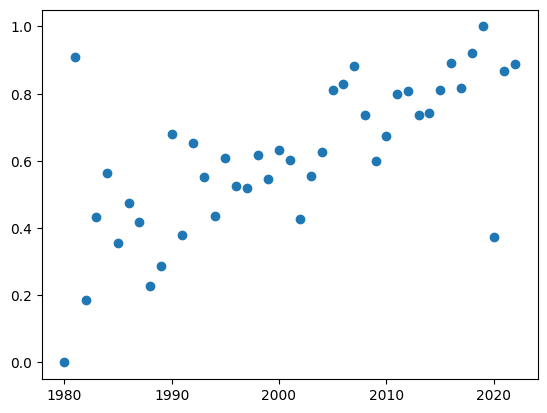

In [207]:
plt.scatter(x1,y)
# plt.plot(myline, mymodel(myline))
plt.show()

In [208]:
# Split the data

In [209]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [210]:
X = df.drop("GDP",axis=1)
y = df.GDP

In [211]:
X.shape,y.shape

((43, 12), (43,))

In [212]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2,random_state=17)

# Multiple Regression model

In [213]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

18.22061243198697
[-0.00931544  0.62043735  0.3129435  -0.13791473 -0.3129435   1.63623744
  0.12396406 -0.0319419  -0.99683581  0.05142901 -0.12497671  0.52308454]


In [214]:
xtrain.shape,xtest.shape

((34, 12), (9, 12))

In [215]:
ytrain.shape,ytest.shape

((34,), (9,))

In [216]:
lm.score(xtest,ytest)

0.8092365471179529

# Ordinary least square Regression

In [217]:
x=df.drop("GDP",axis=1)
y=df.GDP
import statsmodels.formula.api as smf

lm=smf.ols(formula='y~x',data=df).fit()  #ordinary least square method
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     4.362
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           0.000578
Time:                        21:53:08   Log-Likelihood:                 24.019
No. Observations:                  43   AIC:                            -24.04
Df Residuals:                      31   BIC:                            -2.904
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1471     23.656      0.513      0.611     -36.099      60.394
x[0]          -0.0093      0.018     -0.530      0.600      -0.045       0.027
x[1]           0.6204      0.480      1.294      0.205      -0.358       1.598
x[2]           6.3865     11.262      0.567      0.575     -16.582      29.355
x[3]          -0.1379      0.289     -0.477      0.637      -0.728       0.452
x[4]           5.7606     12.433      0.463      0.646     -19.596      31.118
x[5]           1.6362      2.637      0.620      0.540      -3.743       7.015
x[6]           0.1240      0.354      0.351      0.728      -0.597       0.845
x[7]          -0.0319      0.166     -0.192      0.849      -0.371       0.307
x[8]          -0.9968      1.278     -0.780      0.441      -3.603       1.610
x[9]           0.0514      0.174      0.296      0.769      -0.303       0.405
x[10]         -0.1250      0.203     -0.616      0.542      -0.538       0.288
x[11]          0.5231      0.564      0.928      0.361      -0.627       1.673
==============================================================================
Omnibus:                        2.992   Durbin-Watson:                   2.562
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.165
Skew:                           0.171   Prob(JB):                        0.339
Kurtosis:                       4.045   Cond. No.                     1.93e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Ridge regression model

In [218]:
from sklearn.linear_model import Ridge

In [219]:
#Ridge Regression Model
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(xtrain,ytrain)
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, ridgeReg.predict(xtrain)))))

print("Mean squared error for test data:{}".format(sqrt(mean_squared_error(ytest, ridgeReg.predict(xtest)))))

print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(xtest, ytest)))

Mean squared error for train data:0.17184296744332211
Mean squared error for test data:0.08939373735130868
R2 Value/Coefficient of Determination: 0.7670870591558264


# Lasso regression model

In [220]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold



In [221]:
print('##-----------LASSO REGRESSION----------------#############')
##Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. 
## absulate sum of square

lasso = Lasso(alpha = .05)
lasso.fit(xtrain,ytrain)
train_score_ls =lasso.score(xtrain,ytrain)
test_score_ls =lasso.score(xtest,ytest)
print(train_score_ls)
print(test_score_ls)

print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, lasso.predict(xtrain)))))

print("Mean squared error for test data:{}".format(sqrt(mean_squared_error(ytest, lasso.predict(xtest)))))

print('R2 Value/Coefficient of Determination: {}'.format(lasso.score(xtest, ytest)))

##-----------LASSO REGRESSION----------------#############
0.3829289620484374
0.7879380235526038
Mean squared error for train data:0.17527770643493823
Mean squared error for test data:0.08529855762512636
R2 Value/Coefficient of Determination: 0.7879380235526038


# Support vector regression

In [222]:
from sklearn.svm import SVR
model_svr=SVR(kernel="rbf")
model_svr.fit(xtrain,ytrain)


SVR()

In [223]:
model_svr.score(xtest,ytest)

-0.3083200037304983

In [224]:
y_pred=model_svr.predict(xtest)
print(y_pred[:4])
r2_score(ytest,y_pred)

[0.60268015 0.60035711 0.59958083 0.60091017]


-0.3083200037304983

# Random Forest Regressor

In [225]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)


(34, 12)
(9, 12)
(34,)


In [226]:
from sklearn.ensemble import RandomForestRegressor
RFreg=RandomForestRegressor(n_estimators=50,max_depth=15,min_samples_split=2)
RFreg.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=15, n_estimators=50)

In [227]:
output=pred_RFreg=RFreg.predict(xtest)
output
print(pred_RFreg[:4]) #prediction next four gdp

[0.74549575 0.58818697 0.51424929 0.59031161]


In [228]:
output[1]

0.5881869688385271

In [229]:
RFreg.score(xtest,ytest)

0.6953185794479964

In [230]:
from sklearn import metrics
metrics.r2_score(ytest,pred_RFreg)

0.6953185794479964

# GradientBoostRegressor

In [231]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

In [232]:
#Instantiate Gradient Boosting Regressor
gbc = GradientBoostingRegressor(n_estimators=500,
                                 learning_rate=0.01,
                                 random_state=44,
                                 max_features=5 )

In [233]:
#fit
gbc.fit(xtrain, ytrain)
 
# Predict on test set
pred_y = gbc.predict(xtest)
print("Prediction of GDP",pred_y[:4])
 

Prediction of GDP [0.68187128 0.57438559 0.60400103 0.56734069]


In [234]:
# test set RMSE
test_rmse = mean_squared_error(ytest, pred_y) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))


Root mean Square error: 0.14


In [235]:
metrics.r2_score(ytest,pred_y)

0.45081012610231974

# AdaboostRegressor

In [236]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
adr.fit(xtrain, ytrain)
y_pred = adr.predict(xtest)
print(y_pred[:4])
print("AdaBoost - R2: ",
      r2_score(ytest, y_pred))

[0.8431625  0.60717658 0.5089985  0.60717658]
AdaBoost - R2:  0.8342684947574478
